<a href="https://colab.research.google.com/github/ZinaTlish/DZ-DA/blob/main/%D0%94%D0%977%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
#Функция преобразует массив значений в матрицу для обучения модели

In [ ]:
tf.random.set_seed(7)
#Устанавливает случайное зерно для TensorFlow, дает повторяемость результатов при запуске кода.

In [ ]:
file_paths = ['/content/gdrive/MyDrive/Covid/100.csv', '/content/gdrive/MyDrive/Covid/101.csv', '/content/gdrive/MyDrive/Covid/102.csv', '/content/gdrive/MyDrive/Covid/103.csv','/content/gdrive/MyDrive/Covid/104.csv']


In [ ]:
# load the dataset
dataframe = read_csv('/content/gdrive/MyDrive/Covid/100.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
dataset = dataset[0:5000]
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#Разделение данных на обучающий и тестовый наборы

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#Решейп данных для LSTM

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)
#Создание и обучение LSTM модели

Epoch 1/5
3348/3348 - 10s - loss: 0.0118 - 10s/epoch - 3ms/step
Epoch 2/5
3348/3348 - 7s - loss: 5.9804e-04 - 7s/epoch - 2ms/step
Epoch 3/5
3348/3348 - 8s - loss: 3.1052e-04 - 8s/epoch - 2ms/step
Epoch 4/5
3348/3348 - 6s - loss: 1.8827e-04 - 6s/epoch - 2ms/step
Epoch 5/5
3348/3348 - 7s - loss: 1.7190e-04 - 7s/epoch - 2ms/step


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

52/52 [==============================] - 0s 2ms/step


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#Предсказания инвертируются обратно в исходный масштаб данных.

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#Рассчитываются значения RMSE для оценки точности модели на обучающем и тестовом наборах данных.

Train Score: 11.34 RMSE
Test Score: 10.41 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#Подготавливаются массивы для визуализации данных, заполняя их предсказанными значениями и NaN для остальных временных шагов.

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

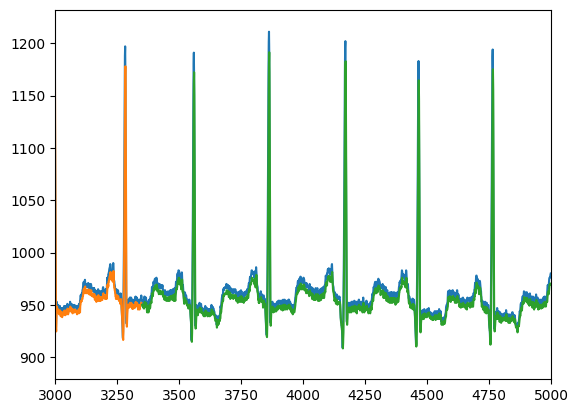

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlim([3000,5000])
plt.show()

В данном коде применяются рекуррентные нейронные сети для прогнозирования временного ряда.

*   Нормализация данных помогает ускорить обучение модели
*   Функция create_dataset формирует данные для обучения и тестирования в виде входных последовательностей и соответствующих выходных значений. Также она создает временные шаги для прогнозирования.
*   Модель состоит из одного слоя LSTM с 4 блоками памяти и выходного слоя Dense с одним нейроном - простая архитектура.


Модель можно сделать более реалистичной:

*   Можно применить более сложную архитектуру модели:

model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))


*   Использовать больший объем данных для обучения
*   Можно изменить размер окна прогнозирования "look_back" на более высокое значение.